# Dataset Exploration

This notebook explores the dataset characteristics:
1. Introduction
2. Dataset Description
3. Number of Samples
4. Emotion Classes
5. Class Distribution
6. Text Length Analysis
7. Summary of Findings

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

DATA_DIR = Path("../data")


def load_dataset(file_name: str) -> pd.DataFrame:
    path = DATA_DIR / file_name
    return pd.read_csv(path, sep=";", header=None, names=["text", "emotion"])


train_df = load_dataset("train.txt")
test_df = load_dataset("test.txt")
full_df = pd.concat([train_df, test_df], ignore_index=True)

train_df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


## 1. Introduction

We will look at the train and test splits, then summarize counts, labels, and text lengths.

## 2. Dataset Description

In [2]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Columns: {list(train_df.columns)}")

train_df.sample(5, random_state=42)

Train shape: (16000, 2)
Test shape: (2000, 2)
Columns: ['text', 'emotion']


,text,emotion
8756,ive made it through a week i just feel beaten ...,sadness
4660,i feel this strategy is worthwhile,joy
6095,i feel so worthless and weak what does he have...,sadness
304,i feel clever nov,joy
8241,im moved in ive been feeling kind of gloomy,sadness


## 3. Number of Samples

In [3]:
counts = {
    "train": len(train_df),
    "test": len(test_df),
    "total": len(full_df),
}

print(f"Train samples: {counts['train']}")
print(f"Test samples: {counts['test']}")
print(f"Total samples: {counts['total']}")

Train samples: 16000
Test samples: 2000
Total samples: 18000


## 4. Emotion Classes

In [4]:
classes = sorted(full_df["emotion"].unique())

print("Classes:", classes)
print("Number of classes:", len(classes))

Classes: ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
Number of classes: 6


## 5. Class Distribution

Train distribution:
 emotion
anger       2159
fear        1937
joy         5362
love        1304
sadness     4666
surprise     572
Name: count, dtype: int64

Test distribution:
 emotion
anger       275
fear        224
joy         695
love        159
sadness     581
surprise     66
Name: count, dtype: int64


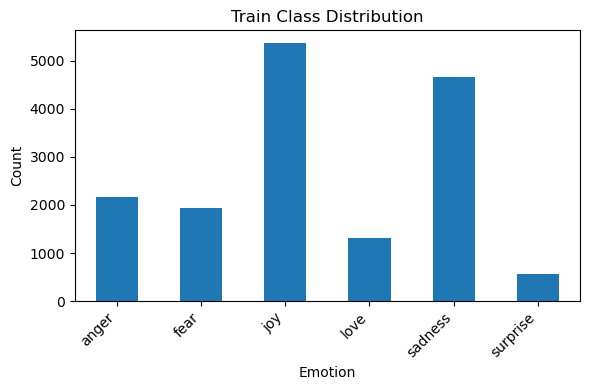

In [8]:
train_class_counts = train_df["emotion"].value_counts().sort_index()
test_class_counts = test_df["emotion"].value_counts().sort_index()

print("Train distribution:\n", train_class_counts)
print("\nTest distribution:\n", test_class_counts)

fig, ax = plt.subplots(figsize=(6, 4))
train_class_counts.plot(kind="bar", ax=ax, title="Train Class Distribution")
ax.set_xlabel("Emotion")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 6. Text Length Analysis

Character length stats:
 count    18000.000000
mean        96.817000
std         55.882504
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: char_len, dtype: float64

Word length stats:
 count    18000.000000
mean        19.164944
std         10.989429
min          2.000000
25%         11.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: word_len, dtype: float64


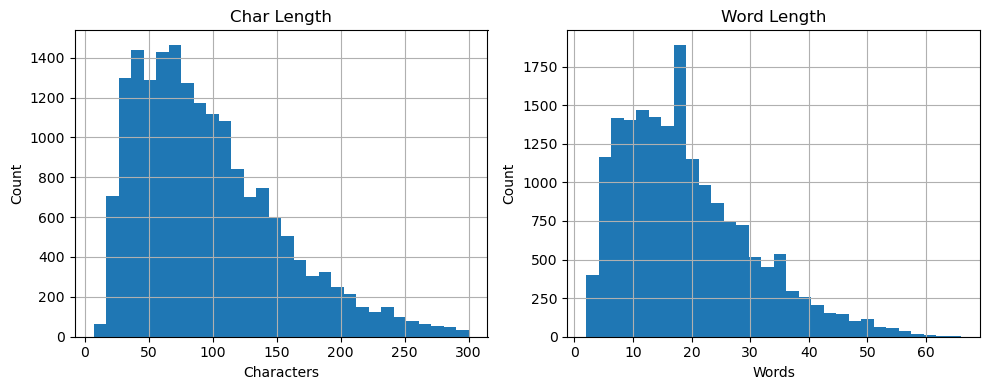

In [6]:
def add_length_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df["char_len"] = df["text"].str.len()
    df["word_len"] = df["text"].str.split().str.len()
    return df


full_df = add_length_features(full_df)

print("Character length stats:\n", full_df["char_len"].describe())
print("\nWord length stats:\n", full_df["word_len"].describe())

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
full_df["char_len"].hist(bins=30, ax=axes[0])
axes[0].set_title("Char Length")
axes[0].set_xlabel("Characters")
axes[0].set_ylabel("Count")

full_df["word_len"].hist(bins=30, ax=axes[1])
axes[1].set_title("Word Length")
axes[1].set_xlabel("Words")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## 7. Summary of Findings

In [7]:
most_common_class = train_class_counts.idxmax()
least_common_class = train_class_counts.idxmin()

summary_lines = [
    f"Total samples: {counts['total']} (train={counts['train']}, test={counts['test']})",
    f"Number of classes: {len(classes)} -> {classes}",
    f"Most common train class: {most_common_class} ({train_class_counts[most_common_class]})",
    f"Least common train class: {least_common_class} ({train_class_counts[least_common_class]})",
    f"Median word length: {full_df['word_len'].median():.1f}",
    f"Median char length: {full_df['char_len'].median():.1f}",
]

print("Summary:")
for line in summary_lines:
    print("-", line)

Summary:
- Total samples: 18000 (train=16000, test=2000)
- Number of classes: 6 -> ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
- Most common train class: joy (5362)
- Least common train class: surprise (572)
- Median word length: 17.0
- Median char length: 86.0
